In [12]:
import sys
from pathlib import Path

project_root = Path.cwd().parents[0]
sys.path.append(str(project_root))

import matplotlib.pyplot as plt
import numpy as np
import torch
from source.dataset import *
import uproot

def plot_event(dataset, idx):
    x, targets = dataset[idx]

    zx = x[0]
    zy = x[1]
    scint_zx = x[2]

    zx = zx.squeeze(0).numpy()
    zy = zy.squeeze(0).numpy()

    fig, ax = plt.subplots(1, 3, figsize=(14, 5))

    im0 = ax[0].imshow(
        zx,
        origin="lower",
        aspect="auto",
    )
    ax[0].set_title("ZX projection")
    ax[0].set_xlabel("X bin")
    ax[0].set_ylabel("Z bin")
    plt.colorbar(im0, ax=ax[0])

    im1 = ax[1].imshow(
        zy,
        origin="lower",
        aspect="auto",
    )
    ax[1].set_title("ZY projection")
    ax[1].set_xlabel("Y bin")
    ax[1].set_ylabel("Z bin")
    plt.colorbar(im1, ax=ax[1])

    im1 = ax[2].imshow(
        scint_zx.squeeze(0),
        origin="lower",
        aspect="auto",
    )
    ax[2].set_title("Scint ZX projection")
    ax[2].set_xlabel("Y bin")
    ax[2].set_ylabel("X bin")
    plt.colorbar(im1, ax=ax[2])

    E = 10**targets["E_nu"]
    ELep = 10**targets["E_lep"]
    vx, vy, vz = targets["vx"], targets["vy"], targets["vz"]

    fig.suptitle(
        f"Event {idx} | Eν = {E:.2f} GeV | "
        f"Event {idx} | ELep = {ELep:.2f} GeV | "
        f"vtx=({vx:.1f}, {vy:.1f}, {vz:.1f})"
    )

    plt.tight_layout()
    plt.show()


In [9]:
dataset = torch.load("../data/10008/10008_000.pt", map_location="cpu", weights_only=False)
print(len(dataset))


1000


In [10]:
x, targets = dataset[0]
zx = x[0]
zy = x[1]
scint_zx = x[2]
print(len(x))

print("ZX shape:", zx.shape)  # (1, Z, X)
print("ZY shape:", zy.shape)  # (1, Z, Y)
print("ZY shape:", scint_zx.shape)  # (1, Z, Y)
print("Targets:", targets)


4
ZX shape: torch.Size([1, 100, 2048])
ZY shape: torch.Size([1, 100, 2048])
ZY shape: torch.Size([1, 74, 27])
Targets: {'E_nu': np.float64(2.843419665204918), 'weight': np.float64(0.4444444444444445), 'vx': np.float64(-121.72957984768132), 'vy': np.float64(1.7455620504840823), 'vz': np.float64(80.98726505134078), 'E_lep': np.float32(2.6153646), 'Eta_lep': np.float32(5.1874843), 'E_had': np.float32(2.4546597)}


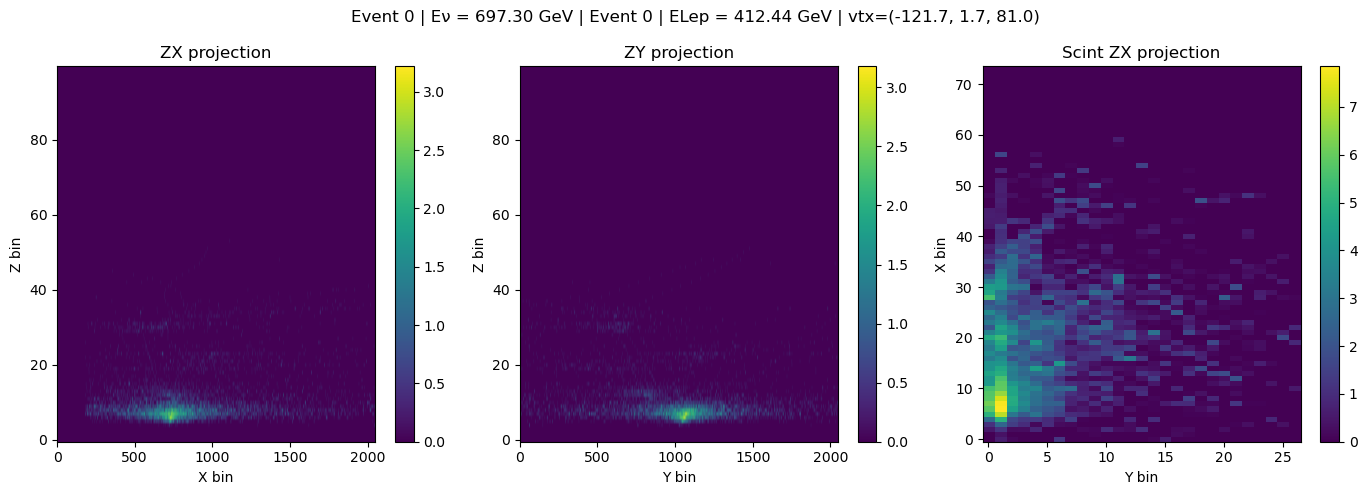

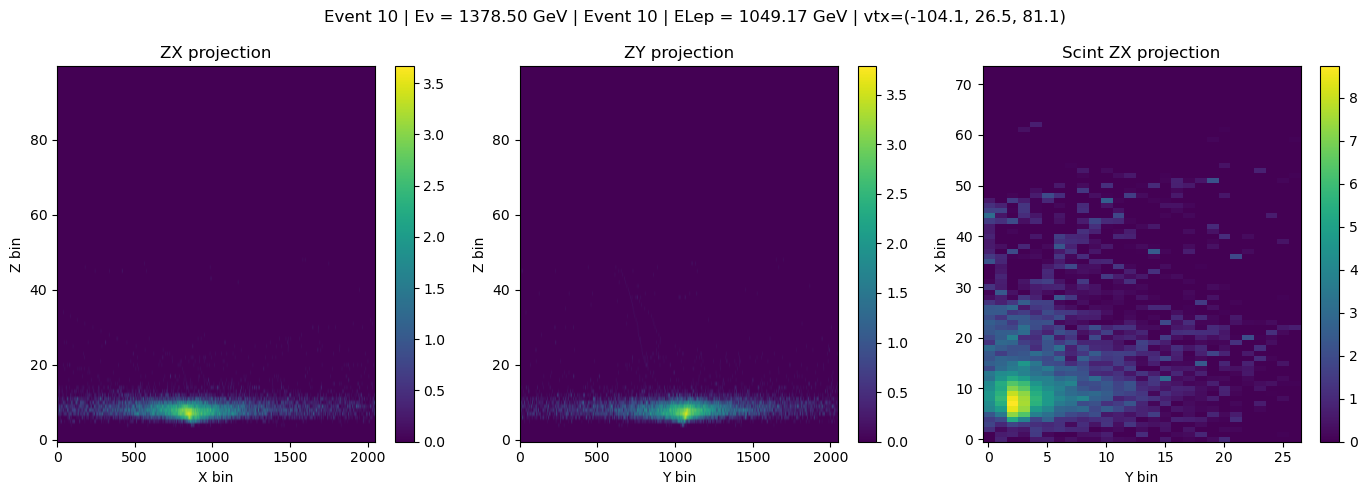

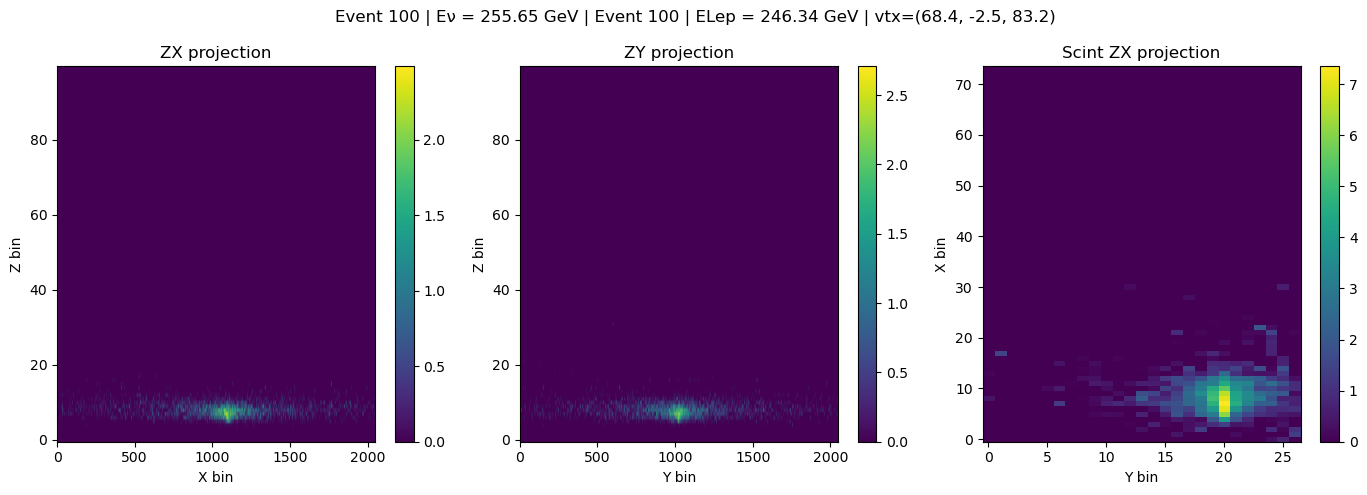

In [13]:
plot_event(dataset, idx=0)
plot_event(dataset, idx=10)
plot_event(dataset, idx=100)


In [ ]:
ENu = []
EHad = []
for i in range(len(dataset)):
    (zx, zy), targets = dataset[i]
    ENu.append(10**targets["E_nu"])
    EHad.append(10**targets["E_had"])


plt.hist(ENu, bins=50, histtype="step")
plt.xlabel("Neutrino Energy (GeV)")
plt.ylabel("Counts")
plt.yscale("log")
plt.title("Neutrino Energy Distribution in Dataset")
plt.show()

In [ ]:
plt.hist(EHad, bins=50, histtype="step")
print(EHad)
plt.xlabel("Neutrino Energy (GeV)")
plt.ylabel("Counts")
plt.yscale("log") 
plt.title("Neutrino Energy Distribution in Dataset")
plt.show()

In [ ]:
scint_1layer = uproot.open("/home/benwilson/data/pinpointG4_data/root/10008/10008_000.root")

In [ ]:
scint_hits = scint_1layer["Hits/scintHits"].arrays(["layerID", "edep"], library='np')

In [ ]:
import awkward as ak
fig, ax = plt.subplots()
ax.hist2d(np.ravel(scint_hits["layerID"]), np.ravel(scint_hits["edep"]))